In [4]:
from bisca_models.debug_model import TestStates, DebugModel
from bisca_env.observation import Observation, History
from bisca_env.players import NeuralNetwork, Random, MarcosStrat, RandomOut
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, pickle

0.010000220555493402

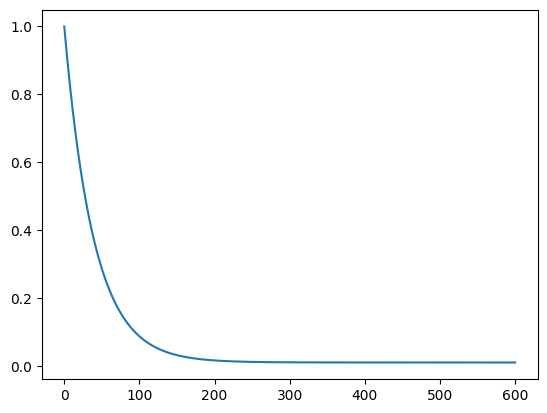

In [5]:
from bisca_models.models import Exploration
 
exploration = Exploration(
    min_epsilon=0.01,
    x_percent_at_k_min=0.3,
    train_episodes=600,
)

x = np.linspace(0, 600, 1000)
y = exploration.get_epsilon(x)

plt.plot(x, y)
y[-1]

In [8]:
states_predict = [
        {
            "mao": "10-e, 3-p, 5-c",
            "mesa": "7-p", 
            "bisca": "6-e"
        },
        {
            "mao": "10-e, 10-p, 5-c",
            "mesa": "v", 
            "bisca": "6-e"
        },
        {
            "mao": "8-p, 5-c, 8-e",
            "mesa": "2-o", 
            "bisca": "4-c"
        },
        {
            "mao": "10-p, 8-p, 3-o",
            "mesa": "9-p", 
            "bisca": "4-c"
        },
        {
            "mao": "10-p, 8-p, 3-o",
            "mesa": "9-p", 
            "bisca": "4-o"
        },
        {
            "mao": "10-p, 11-c, 3-o",
            "mesa": "4-p", 
            "bisca": "4-c"
        },
        {
            "mao": "3-c, 5-c, 5-p",
            "mesa": "v", 
            "bisca": "12-p"
        },
        {
            "mao": "3-e, 12-p, 4-c",
            "mesa": "3-c", 
            "bisca": "5-p"
        },
    ]

# model = load_model("saved_model/simple4")
model = load_model("checkpoint/model")
test = TestStates(model, History(), states_predict)
# test2 = TestStates(model2, states_predict[-3:])
test.print_pred()
# test2.print_pred()

{'mao': '10-e, 3-p, 5-c', 'mesa': '7-p', 'bisca': '6-e'}
3-paus     : -1.925
10-espadas : -2.365
5-copas    : -2.365

{'mao': '10-e, 10-p, 5-c', 'mesa': 'v', 'bisca': '6-e'}
10-paus    : -0.736
10-espadas : -1.788
5-copas    : -1.498

{'mao': '8-p, 5-c, 8-e', 'mesa': '2-o', 'bisca': '4-c'}
8-paus     : -3.426
8-espadas  : -3.894
5-copas    : -3.581

{'mao': '10-p, 8-p, 3-o', 'mesa': '9-p', 'bisca': '4-c'}
3-ouro     : -5.491
10-paus    : -5.372
8-paus     : -5.314

{'mao': '10-p, 8-p, 3-o', 'mesa': '9-p', 'bisca': '4-o'}
3-ouro     : -2.646
10-paus    : -3.212
8-paus     : -3.014

{'mao': '10-p, 11-c, 3-o', 'mesa': '4-p', 'bisca': '4-c'}
3-ouro     : -2.062
11-copas   : -2.098
10-paus    : -2.819

{'mao': '3-c, 5-c, 5-p', 'mesa': 'v', 'bisca': '12-p'}
3-copas    : -2.540
5-paus     : -3.183
5-copas    : -2.973

{'mao': '3-e, 12-p, 4-c', 'mesa': '3-c', 'bisca': '5-p'}
3-espadas  : -3.694
12-paus    : -4.891
4-copas    : -4.284



In [9]:
# model = load_model("saved_model/history_6")
# model = load_model("saved_model/model_v5.h5")
# model = load_model("checkpoint/model")
# model = load_model("saved_model/history_4")
# p1 = NeuralNetwork(model, History())
# p1 = RandomOut(Observation())
p1 = MarcosStrat(Observation())

# model2 = load_model("saved_model/history_4")
# p2 = NeuralNetwork(model2, History())
p2 = Random()
# p2 = MarcosStrat()

DebugModel.player_battle(p1, p2, 500, verbose=True)

Progresso: 10 % | pc_win = 90.00
Progresso: 20 % | pc_win = 91.00
Progresso: 30 % | pc_win = 90.67
Progresso: 40 % | pc_win = 89.50
Progresso: 50 % | pc_win = 89.20
Progresso: 60 % | pc_win = 87.33
Progresso: 70 % | pc_win = 86.00
Progresso: 80 % | pc_win = 86.50
Progresso: 90 % | pc_win = 86.22
Progresso: 100 % | pc_win = 86.60
Porcentagem de vitória: 86.80
Reward médio          : 34.58


(86.8, 34.578)

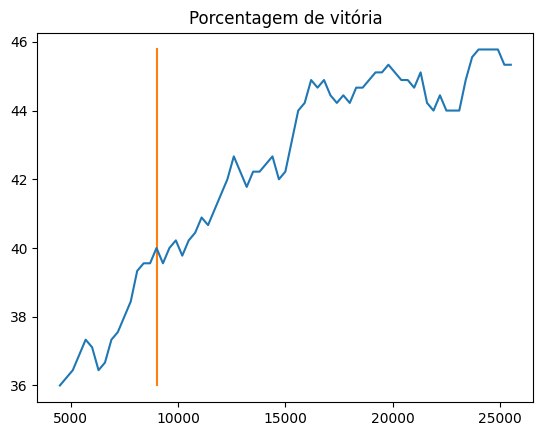

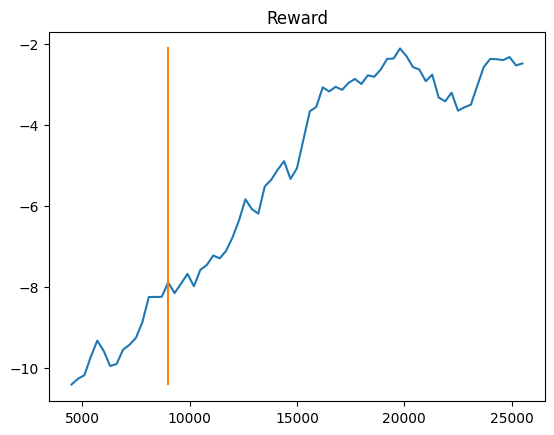

In [10]:
path = "debug_info/pc_victory.npy"
# path = "checkpoint/debug/pc_victory.npy"

with open("checkpoint/config/exploration.pickle", "rb") as f:
    exploration_cfg = pickle.load(f)
exploration_limit = exploration_cfg["x_percent_at_k_min"] * exploration_cfg["train_episodes"]

eps, pc_vic, rewards = np.load(path)
# pc_vic = pc_vic[-50:]

num_samples = len(pc_vic)
kernel_size = int(0.3 * num_samples)
final_id = kernel_size

kernel_mean = []
kernel_std = []
kernel_mean_r = []
kernel_std_r = []
kernel_ep = []
while final_id < num_samples + 1:
    init_id = final_id - kernel_size
    kernel_mean.append(pc_vic[init_id:final_id].mean())
    kernel_std.append(pc_vic[init_id:final_id].std())
    kernel_mean_r.append(rewards[init_id:final_id].mean())
    kernel_std_r.append(rewards[init_id:final_id].std())
    kernel_ep.append(eps[(init_id + final_id)//2])
    final_id += 1

plt.title("Porcentagem de vitória")
plt.errorbar(kernel_ep, kernel_mean)
# plt.errorbar(kernel_ep, kernel_mean, yerr=kernel_std)
plt.plot([exploration_limit]*2, [min(kernel_mean), max(kernel_mean)])

plt.figure()
plt.title("Reward")
# plt.errorbar(kernel_ep, kernel_mean_r, yerr=kernel_std_r)
plt.plot(kernel_ep, kernel_mean_r)
plt.plot([exploration_limit]*2, [min(kernel_mean_r), max(kernel_mean_r)])

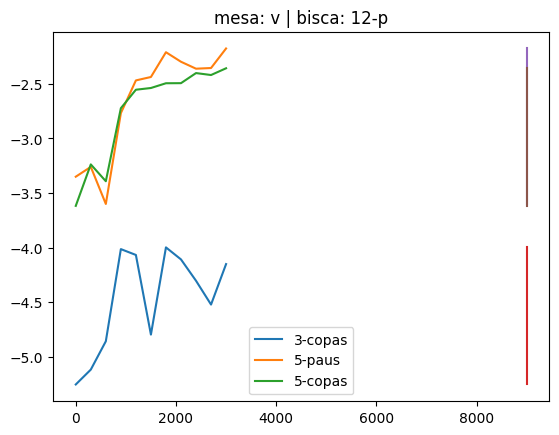

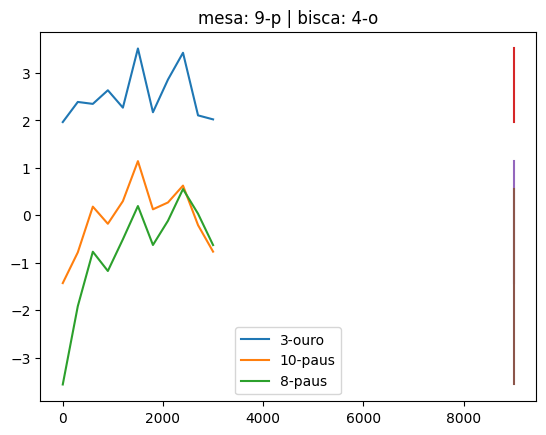

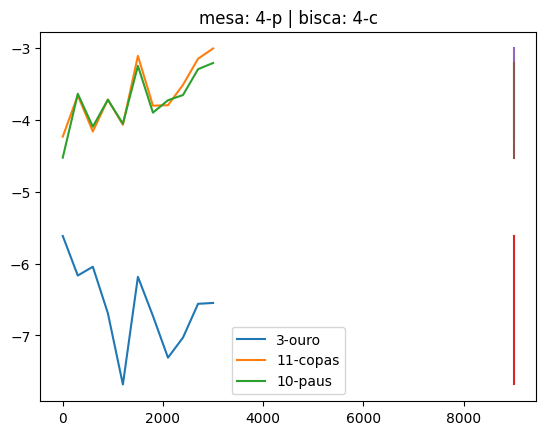

In [11]:
states_predict = []
path = "debug_info/teste_state"
path = "checkpoint/debug/teste_state"

with open("checkpoint/config/exploration.pickle", "rb") as f:
    exploration_cfg = pickle.load(f)
exploration_limit = exploration_cfg["x_percent_at_k_min"] * exploration_cfg["train_episodes"]

df_path = path + "\dfs"
for file_name in os.listdir(df_path):
    states_predict.append(pd.read_csv(os.path.join(df_path, file_name), index_col=0))

with open(path + "/states_info.pickle", "rb") as f:
    states = pickle.load(f)["states"]

for i in range(len(states_predict)):
    plt.figure(i)
    plt.title(f"mesa: {states[i]['mesa']} | bisca: {states[i]['bisca']}")
    predicts: pd.DataFrame = states_predict[i]
    for c_name in predicts.columns:
        plt.plot(predicts.index, predicts[c_name], label=c_name)
    
    max_y = predicts.max()
    min_y = predicts.min()

    plt.plot([exploration_limit]*2, [min_y, max_y])

    plt.legend()
    
